<a href="https://colab.research.google.com/github/Muyikem21/Sunday_INFO5731_Spring2021/blob/main/assignment/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
# converting our txt file to csv for easier importation and cleaning.
import csv

with open('Doc.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('doc.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('title', 'intro'))
        writer.writerows(lines)
        # creating a function for cleaning the text and returning a list of tokens
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens
# creating functions for finding meanings to words and to get to the root word.
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
# filtering our the stopwords.
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
#creating a function that will prepare our texts for topic modelling.
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens
#importing our document and having it split into tokens
import random
text_data = []
with open('doc.csv') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)
['optimal', 'waveband', 'switching', 'optical', 'network']
['design', 'symmetric', 'square', 'pulse', 'shaping', 'filter', 'transmitter', 'receiver']
['detection', 'temperature', 'gradient', 'using', 'power', 'temperature', 'sensor']
['using', 'tree', 'depict', 'forest']
['memoicon', 'using', 'everyday', 'object', 'physical', 'icon']
['mining', 'frequent', 'close', 'cube', 'datasets']
['route', 'dependable', 'connection', 'specify', 'failure', 'restoration', 'guarantee', 'network']
['toward', 'learning', 'base', 'query', 'processing']
['contextual', 'trace', 'base', 'video', 'recommendation']
['question', 'concept', 'inventory', 'circuit', 'course']
['multiresolution', 'painting', 'compositing']
['efficient', 'sampling', 'converter', 'using', 'negative', 'feedback', 'technique']
['fully', 'integrate', 'reconfigurable', 'architecture', 'coherent', 'testing']
['novel', 'power', 'physical', 'design', 'methodology', 'mtcmos']
['computing', 'distance', 'using', 'locally', 'relevant', 'constraint', 'base', 'salient', 'feature', 'alignment']
['offset', 'cancellation', 'crossing', 'base', 'circuit']
['large', 'scale', 'analysis', 'edonkey', 'sharing', 'system']
['impact', 'threshold', 'voltage', 'mismatch', 'current', 'steering', '931;&#916', 'modulators']
['autostereoscopic', 'display']
['prelude', 'future', 'panel']
['design', 'converter', 'couple', 'inductor']
['shadow', 'price', 'vickrey', 'price', 'multipath', 'route']
['probabilistic', 'delay', 'bounds', 'earliest', 'deadline', 'first', 'scheduling']
['marketplace', 'system', 'advertising', 'opportunity', 'datacasting']
['admission', 'control', 'scheme', 'predictable', 'server', 'response', 'access']
[ ]

# creating a dictionary from our data
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text)
for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')
# finding 10 topics within our data.
import gensim
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('10-topic.gensim')
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
  print(topic)
  (0, '0.045*"predictable" + 0.045*"frequent" + 0.045*"mining" + 0.045*"access" + 0.045*"datasets"')
(1, '0.082*"circuit" + 0.043*"base" + 0.043*"crossing" + 0.043*"offset" + 0.043*"cancellation"')
(2, '0.093*"using" + 0.049*"physical" + 0.049*"depict" + 0.049*"tree" + 0.049*"forest"')
(3, '0.051*"route" + 0.051*"price" + 0.027*"converter" + 0.027*"failure" + 0.027*"restoration"')
(4, '0.045*"base" + 0.045*"contextual" + 0.045*"deadline" + 0.045*"recommendation" + 0.045*"video"')
(5, '0.074*"system" + 0.039*"network" + 0.039*"sharing" + 0.039*"opportunity" + 0.039*"marketplace"')
(6, '0.076*"autostereoscopic" + 0.076*"display" + 0.007*"using" + 0.007*"base" + 0.007*"design"')
(7, '0.071*"prelude" + 0.071*"panel" + 0.071*"future" + 0.006*"using" + 0.006*"base"')
(8, '0.047*"base" + 0.047*"toward" + 0.047*"processing" + 0.047*"coherent" + 0.047*"integrate"')
(9, '0.065*"design" + 0.044*"temperature" + 0.044*"power" + 0.044*"using" + 0.023*"filter"')



# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

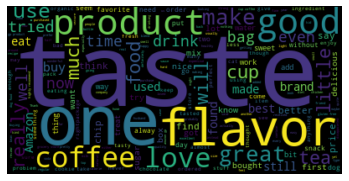

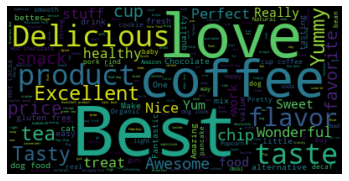

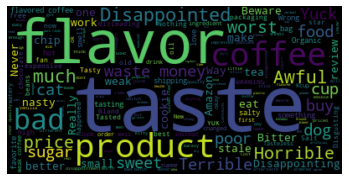

              precision    recall  f1-score   support

          -1       0.49      0.78      0.60       232
           1       0.97      0.89      0.93      1760

    accuracy                           0.88      1992
   macro avg       0.73      0.84      0.77      1992
weighted avg       0.91      0.88      0.89      1992



In [9]:
# importing out library and loading our dataset
import pandas as pd
amazon = pd.read_csv("amazon_reviews.csv")
amazon.columns= amazon.columns.str.lower()
amazon.columns = amazon.columns.str.strip()
amazon.head()
# plotting the product scores to see the distribution of the reviews.
import plotly.express as px
fig = px.histogram(amazon, x="score")
fig.update_layout(title_text='Product Score')
fig.show()
#creating a pictorial view of most occuring words.
import nltk
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in amazon.text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('general_wordcloud.png')
plt.show()
#removing reviews with a score of 3 since they arent biased on either side.
amazon = amazon[amazon['score'] != 3]
amazon['sentiment'] = amazon['score'].apply(lambda rating : +1 if rating > 3 else -1)
amazon.shape
# split the reviews into positive and negative sentiment:
positive = amazon[amazon['sentiment'] == 1]
negative = amazon[amazon['sentiment'] == -1]
# a pictorial view of words mostly used in positive reviews
# good and great have been removed because there were instances of them in negative sentiments
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 
pos = " ".join(review for review in positive.summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('positive_wordcloud.png')
plt.show()
# creating a pictorial view for negative reviews.
neg = " ".join(review for review in negative.summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('negative_wordcloud.png')
plt.show()
# a graph showing distribution of the reviews
amazon['sentiment_type'] = amazon['sentiment'].replace({-1 : 'negative'})
amazon['sentiment_type'] = amazon['sentiment_type'].replace({1 : 'positive'})
fig = px.histogram(amazon, x="sentiment_type")
fig.update_layout(title_text='Product Sentiment')
fig.show()
# removing punctuation from the data
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
amazon['text'] = amazon['text'].apply(remove_punctuation)
amazon = amazon.dropna(subset=['summary'])
amazon['summary'] = amazon['summary'].apply(remove_punctuation)
amazon_new = amazon[['summary','sentiment']]
amazon_new.head()
# random split train and test data
import numpy as np
index = amazon.index
amazon['random_number'] = np.random.randn(len(index))
train = amazon[amazon['random_number'] <= 0.8]
test = amazon[amazon['random_number'] > 0.8]
# converting the text into a bag-of-words model using countvectorizer, since the logistic regression algorithm cannot understand text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['summary'])
test_matrix = vectorizer.transform(test['summary'])
# splitting the independent and dependent variables
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']
# creating the logistic regression
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression()
# fitting the regression model
log_regressor.fit(X_train,y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
# predicting using the model
predictions = log_regressor.predict(X_test)
# finding the accuracy, precision and recall
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)
print(classification_report(predictions,y_test))





The accuracy for the model is 90% which is fairly good.

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
import zipfile
def main():
    try:
       with zipfile.ZipFile('assignment4-question3-data.zip') as file:
            print('File size is compatible')
    except zipfile.LargeZipFile:
       print('Error: File size if too large')

if __name__ == '__main__': main()
#This means that the zip file is not too large, so we will not need to enable ZIP64 functionality.
# viewing the files in the zip file
filename = 'assignment4-question3-data.zip'
with zipfile.ZipFile(filename, 'r') as file:
  print(file.printdir())
  # unzipping the zip file and extracting the files.
with zipfile.ZipFile(filename, 'r') as file:
  # extracting the files using 'extracall' method
  file.extractall()
  print('Done!')
  # previewing the description file
with open('data_description.txt') as description:
    lines = description.read()
    print(lines)
    #loading our train and test dataset
import pandas as pd
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train.info()
# Data Cleaning
test.columns= test.columns.str.lower()
train.columns= train.columns.str.lower()
#We are going to drop the columns with a high number of non-null variables.
# determining columns with more than 60 null values.
null_thresh = 60
columns = train.columns
null = train.isnull().sum()
null_value_train = pd.DataFrame({'column_name': columns, 'null_values': null})
null_drop = list(null_value_train[null_value_train.null_values>null_thresh].column_name)
print(null_drop)
#dropping the columns.
train1 = train.drop(null_drop, axis=1)
train1.shape
#filling the missing values with the mode of the respective columns.
for column in train1.columns:
    train1[column].fillna(train1[column].mode()[0], inplace=True)
    # checking for any remaining null values
null_thresh1 = 0
columns1 = train1.columns
null1 = train1.isnull().sum()
null_value_train1 = pd.DataFrame({'column_name': columns1, 'null_values': null1})
null_drop1 = list(null_value_train1[null_value_train1.null_values>null_thresh1].column_name)
print(null_drop1)
# checking for any remaining missing values
missing_thresh =0
missing = train1.isna().sum()
missing_value_train1 = pd.DataFrame({'column_name': columns1, 'missing_values': missing})
missing_drop = list(missing_value_train1[missing_value_train1.missing_values>missing_thresh].column_name)
print(missing_drop)
# creating a dataset for the numerical variables only
train1_numerical = train1.select_dtypes(include='int64')
numerical_columns = train1_numerical.columns
train1_numerical.shape
# plotting outliers
import matplotlib.pyplot as plt
import seaborn as sns
columns_numerical = train1_numerical.columns
fig, ax = plt.subplots(len(columns_numerical), figsize = (20, 200))

for i, col_val in enumerate(columns_numerical):

  sns.boxplot(y= train1_numerical[col_val], ax=ax[i])
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()
# dropping the said columns
train1 = train1.drop(['bsmthalfbath','kitchenabvgr'], axis=1)
train1_numerical1 = train1.select_dtypes(include='int64')
train1.shape
# determining the z-score for our values
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train1_numerical1))
print(z)
# removing outliers based on a z-score maximum of 4
train1_numerical2 = train1_numerical1[(z < 4).all(axis=1)]
train1_numerical2.shape
# picking out the id numbers for selection in the larger dataset
index_nos = train1_numerical2['id'].values
# setting Id as the index and singling out our desired values
train2 = train1.set_index(['id'])
# plotting histograms for our dataset
clean_data.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables in dataset")
plt.show()
# plotting the factors against saleprice to see the distribution and relationships.
x_col = "saleprice"
y_columns = clean_data.columns
#for y_col in y_columns:
figure = plt.figure
ax = plt.gca()
ax.scatter(clean_data[x_col], clean_data[y_col])
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_title("{} vs {}".format(x_col, y_col))
plt.legend()
plt.show()
    # converting the categorical variables tu numeric form (integers).
categorical_feature_mask = clean_data.dtypes==object
categorical_cols = clean_data.columns[categorical_feature_mask].tolist()
categorical_cols
# import labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# apply le on categorical feature columns
clean_data[categorical_cols] = clean_data[categorical_cols].apply(lambda col: le.fit_transform(col))
clean_data.head(10)
# Muilticollinearity
# separating the independent variables
independent_var = clean_data.drop(columns='saleprice')
independent_var.head()
# calculating for the VIF in each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = independent_var.columns
vif_data["VIF"] = [variance_inflation_factor(independent_var.values, i)
for i in range(len(independent_var.columns))]  
print(vif_data)
clean_data = clean_data.drop(columns=['yearremodadd', 'yrsold', '1stflrsf', '2ndflrsf', 'bsmtfintype2', 'bsmtunfsf'])
# calculating for the VIF in each feature
independent_var = clean_data.drop(columns='saleprice')
vif_data = pd.DataFrame()
vif_data["feature"] = independent_var.columns
vif_data["VIF"] = [variance_inflation_factor(independent_var.values, i)
for i in range(len(independent_var.columns))]  
print(vif_data)
clean_data = clean_data.drop(columns = ['overallqual', 'yearbuilt', 'grlivarea', 'totrmsabvgrd', 'functional'])
# calculating for the VIF in each feature
independent_var = clean_data.drop(columns='saleprice')
vif_data = pd.DataFrame()
vif_data["feature"] = independent_var.columns
vif_data["VIF"] = [variance_inflation_factor(independent_var.values, i)
for i in range(len(independent_var.columns))]  
print(vif_data)
clean_data =clean_data.drop(columns=['overallcond', 'exterior1st', 'exterior2nd', 'exterqual', 'garagecars'])
# calculating for the VIF in each feature
independent_var = clean_data.drop(columns='saleprice')
vif_data = pd.DataFrame()
vif_data["feature"] = independent_var.columns
vif_data["VIF"] = [variance_inflation_factor(independent_var.values, i)
for i in range(len(independent_var.columns))]  
print(vif_data)
# splitting the data into X and Y.
X = clean_data[independent_var.columns]
Y = clean_data['saleprice']
X.head()
# using the train_test_split with a 80-20 ratio
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#implementing the linear regression model
from sklearn.linear_model import LinearRegression
linregressor = LinearRegression()
linregressor.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
#determining the metrics for success for our model
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_pred_lin = linregressor.predict(X_test)
lin_mse = mean_squared_error(y_pred_lin, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(y_pred_lin, y_test)
print('Linear Regression R squared: %.4f' % regressor.score(X_test, y_test))
print('Linear Regression RMSE: %.4f' % lin_rmse)
print('Linear Regression MAE: %.4f' % lin_mae)
